<a href="https://colab.research.google.com/github/tsions1/DS1002/blob/main/RGB_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eden Mulugeta and Tsion Sahle

In [ ]:
#essential imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

In [ ]:
#Red Filtering
def red(picture):
  red = np.array(picture)
  red[:, :, 1:] = 0
  return Image.fromarray(red)

In [ ]:
#Green Filtering
def green(picture):
  green = np.array(picture)
  green[:, :, [0,2]] = 0
  return Image.fromarray(green)

In [ ]:
#Blue Filtering
def blue(picture):
  blue = np.array(picture)
  blue[:, :, :2] = 0
  return Image.fromarray(blue)

In [ ]:
#Combining all the images (to get the original kind of image)
def combine_filtered_pics (red, green, blue):
  combined= red + green + blue
  return combined

In [ ]:
#Ask the user to put in a picture of their preference
picture_url = input("Enter the URL of a .jpg file: ")
response = requests.get(picture_url)
pic = Image.open(BytesIO(response.content))

Enter the URL of a .jpg file: https://cdn.jwplayer.com/v2/media/aHAQBpgr/thumbnails/IOQWGyV2.jpg


In [ ]:
#Displaying the pictures on the screen
red_filter_picture = red(pic)
green_filter_picture = green(pic)
blue_filter_picture = blue(pic)

redgreen_filter_picture = combine_filtered_pics(np.array(red_filter_picture), np.array(green(pic)), np.zeros_like(np.array(blue(pic))))
redblue_filter_picture = combine_filtered_pics(np.array(red(pic)), np.zeros_like(np.array(green_filter_picture)), np.array(blue(pic)))
greenblue_filter_picture = combine_filtered_pics(np.zeros_like(np.array(red(pic))), np.array(green_filter_picture), np.array(blue_filter_picture))

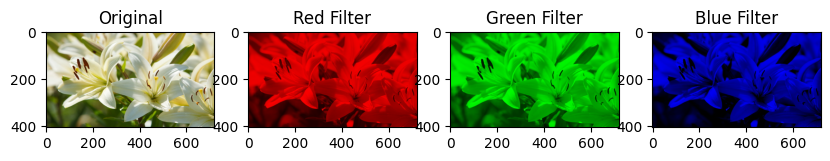

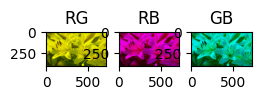

In [ ]:
#Displaying the original and filter ones
#Original
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1)
plt.imshow(pic)
plt.title('Original')
#Red Filter
plt.subplot(1, 4, 2)
plt.imshow(red_filter_picture)
plt.title('Red Filter')
#Green Filter
plt.subplot(1, 4, 3)
plt.imshow(green_filter_picture)
plt.title('Green Filter')
#Blue Filter
plt.subplot(1, 4, 4)
plt.imshow(blue_filter_picture)
plt.title('Blue Filter')

plt.show()

#Red and Green Only (No Blue)
plt.subplot(1, 7, 5)
plt.imshow(redgreen_filter_picture)
plt.title('RG')
#Red and Blue Only (No Green)
plt.subplot(1, 7, 6)
plt.imshow(redblue_filter_picture)
plt.title('RB')
#Green and Blue Only (No Red)
plt.subplot(1, 7, 7)
plt.imshow(greenblue_filter_picture)
plt.title('GB')

plt.show()

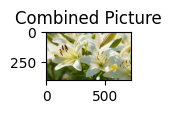

In [ ]:
#Combine the filtered pics
combined_Picture = combine_filtered_pics(np.array(red_filter_picture), np.array(green_filter_picture), np.array(blue_filter_picture))
combined_Picture = Image.fromarray(combined_Picture)

plt.subplot(1, 5, 5)
plt.imshow(combined_Picture)
plt.title('Combined Picture')

plt.show()

In [ ]:
#Testing if the orginial = the combined filter pics (must be true)
combined_Picture = combine_filtered_pics(np.array(red_filter_picture), np.array(green_filter_picture), np.array(blue_filter_picture))
is_identical = np.array_equal(np.array(pic), combined_Picture)
print(f"Original image is identical to combined image: {is_identical}")

Original image is identical to combined image: True
